<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/nn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Data: Carga y Preparación

In [4]:
ruta = 'drive/My Drive/2020 Cursos/tutoriales_nn/'
data = pd.read_excel(ruta + 'demo_data.xlsx', sheet_name='regresion')

In [7]:
data.head(3)

,X1,X2,X3,Y
0,0.34,0.15,0.40,0.381773
1,0.20,0.88,0.87,0.428465
2,0.08,0.33,0.55,0.144339


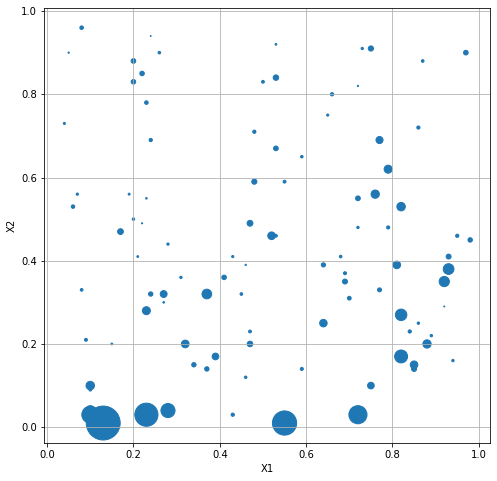

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(data.X1, data.X2, s=data.Y*50)
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
X = np.array(data[['X1', 'X2', 'X3']], dtype='float64')
y = np.array(data.Y, dtype='float32')/data.Y.max()
X.shape, y.shape

((101, 3), (101,))

## 3. Regresión

In [15]:
import torch
from torch import optim  
from torch import nn
#import torch.nn.functional as F 

In [16]:
X_in = torch.from_numpy(np.array(X))
y_in = torch.from_numpy(np.array(y).reshape(-1,1))
X_in.shape, y_in.shape

(torch.Size([101, 3]), torch.Size([101, 1]))

## Arquitectura de Red

In [144]:
class MiRed(nn.Module):
  def __init__(self):
    super(MiRed, self).__init__()
    self.fc1 = torch.nn.Linear(3, 128)
    self.fc2 = torch.nn.Linear(128, 16)
    self.fc3 = torch.nn.Linear(16, 1)
    self.relu = nn.ReLU()

  def forward(self, inputs):
    x = torch.relu(self.fc1(inputs))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [146]:
learning_rate = 0.001
ciclos = 5
num_epochs = 300

In [165]:
model = MiRed()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [172]:
preds = []

for ciclo in range(ciclos):
  
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X_in.float())
    loss = criterion(y_pred, y_in)
    loss.backward()
    optimizer.step()
  
  preds.append(y_pred.detach())

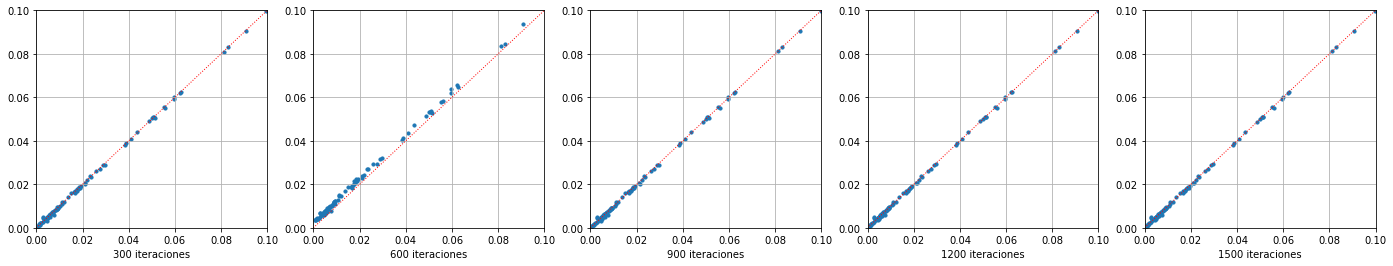

In [173]:
fig, ax = plt.subplots(1, 5, figsize=(24,4))

for i in range(ciclos):
  ax[i].scatter(y_in, preds[i], s=10)
  ax[i].plot([0,1], [0,1], 'r:', lw=1)
  ax[i].grid(True)
  ax[i].set_xlabel(str((i+1)*num_epochs)+' iteraciones')
  ax[i].set_xlim(0,0.1)
  ax[i].set_ylim(0,0.1)

plt.show()

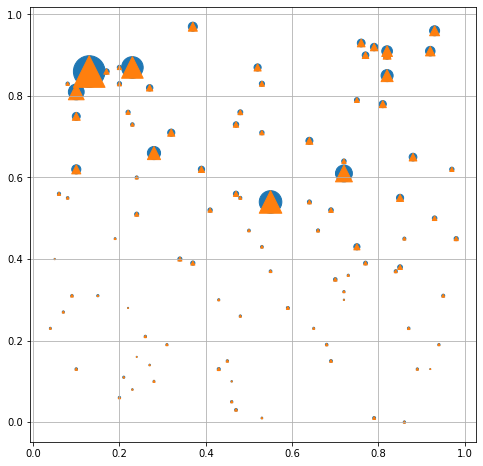

In [174]:
plt.figure(figsize=(8,8))
plt.scatter(data.X1, data.X3, s=np.array(preds[-1])*1000, label='')
plt.scatter(data.X1, data.X3, s=y_in*1000, marker='^')
plt.grid(True)
plt.show()

In [175]:
torch.save(model.state_dict(), ruta + 'modelo_0.pth')

In [ ]:
data_test = data.iloc[30:50, :]
data_test

In [176]:
X_tt = torch.from_numpy(np.array(data_test[['X1', 'X2', 'X3']]))
y_orig = np.array(data_test.Y/max(data_test.Y)).reshape(-1,1)
X_tt.shape, y_orig.shape

(torch.Size([20, 3]), (20, 1))

In [183]:
class MiRed(nn.Module):
  def __init__(self):
    super(MiRed, self).__init__()
    self.fc1 = torch.nn.Linear(3, 128)
    self.fc2 = torch.nn.Linear(128, 16)
    self.fc3 = torch.nn.Linear(16, 1)
    self.relu = nn.ReLU()

  def forward(self, inputs):
    x = torch.relu(self.fc1(inputs))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [184]:
model1 = MiRed()

In [185]:
modelo_load = ruta + 'modelo_0.pth'
model1.load_state_dict(torch.load(modelo_load, map_location=torch.device('cpu')))

<All keys matched successfully>

In [186]:
y_tt_pred = model1(X_tt.float()).detach().squeeze().numpy().reshape(-1,1)

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
lr = LinearRegression()
lr.fit(y_tt_pred, y_orig)
lr_pred = lr.predict(y_orig)

In [189]:
mean_squared_error(y_orig, lr_pred), r2_score(y_orig, lr_pred)

(1.1115374693507597e-10, 0.9999999976497752)

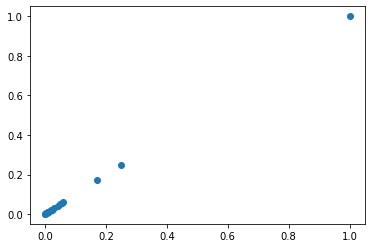

In [190]:
plt.scatter(y_orig, y_tt_pred)